# Business Problem
### House Price Prediction

US based housing company is in property resale business and wants to expand in Australia market. Company wants to understand the variables that impacts the House price so that they can build the strategy accordingly
The objective of this exercise is to build a model that predicts the future house prices based on the most signnificant variables that impact the price

## Importing required libraries


In [1070]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV


import warnings 
warnings.filterwarnings('ignore')

## Reading and understanding the dataset

In [1071]:
housingprices = pd.read_csv('train.csv')
housingprices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

In [1072]:
housingprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Handling Missing Values

### Replace NA with the actual business data(Replace with None) for the following columns. In this case NA is not the null values as per the data dictionary



In [1073]:
Not_NA_Data = {"Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"}

for i in Not_NA_Data:
    housingprices[i].fillna("None", inplace = True)

In [1074]:
housingprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1075]:
#Handling remaining missing columns

# percentage of missing values in each column
round(housingprices.isnull().sum()/len(housingprices.index), 2)*100

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

In [1076]:
#there are no 100% missing values column

#Drop the rows that has 100% missing values
housingprices = housingprices.dropna(axis=0, how='all')

#Drop id column which has not much significance in the analysis

housingprices.drop("Id", axis = 1, inplace = True)

In [1077]:
housingprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [1078]:
# Fixing missing values, replacing with Median for other columns

housingprices['LotFrontage'].fillna(housingprices['LotFrontage'].median(), inplace = True)

housingprices['GarageYrBlt'].fillna(housingprices['GarageYrBlt'].median(), inplace = True)

housingprices['MasVnrArea'].fillna(housingprices['MasVnrArea'].median(), inplace = True)  

housingprices['MasVnrType'].fillna("None", inplace = True)

housingprices['Electrical'].fillna("None", inplace = True)

     

In [1079]:
housingprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Data Analysis 

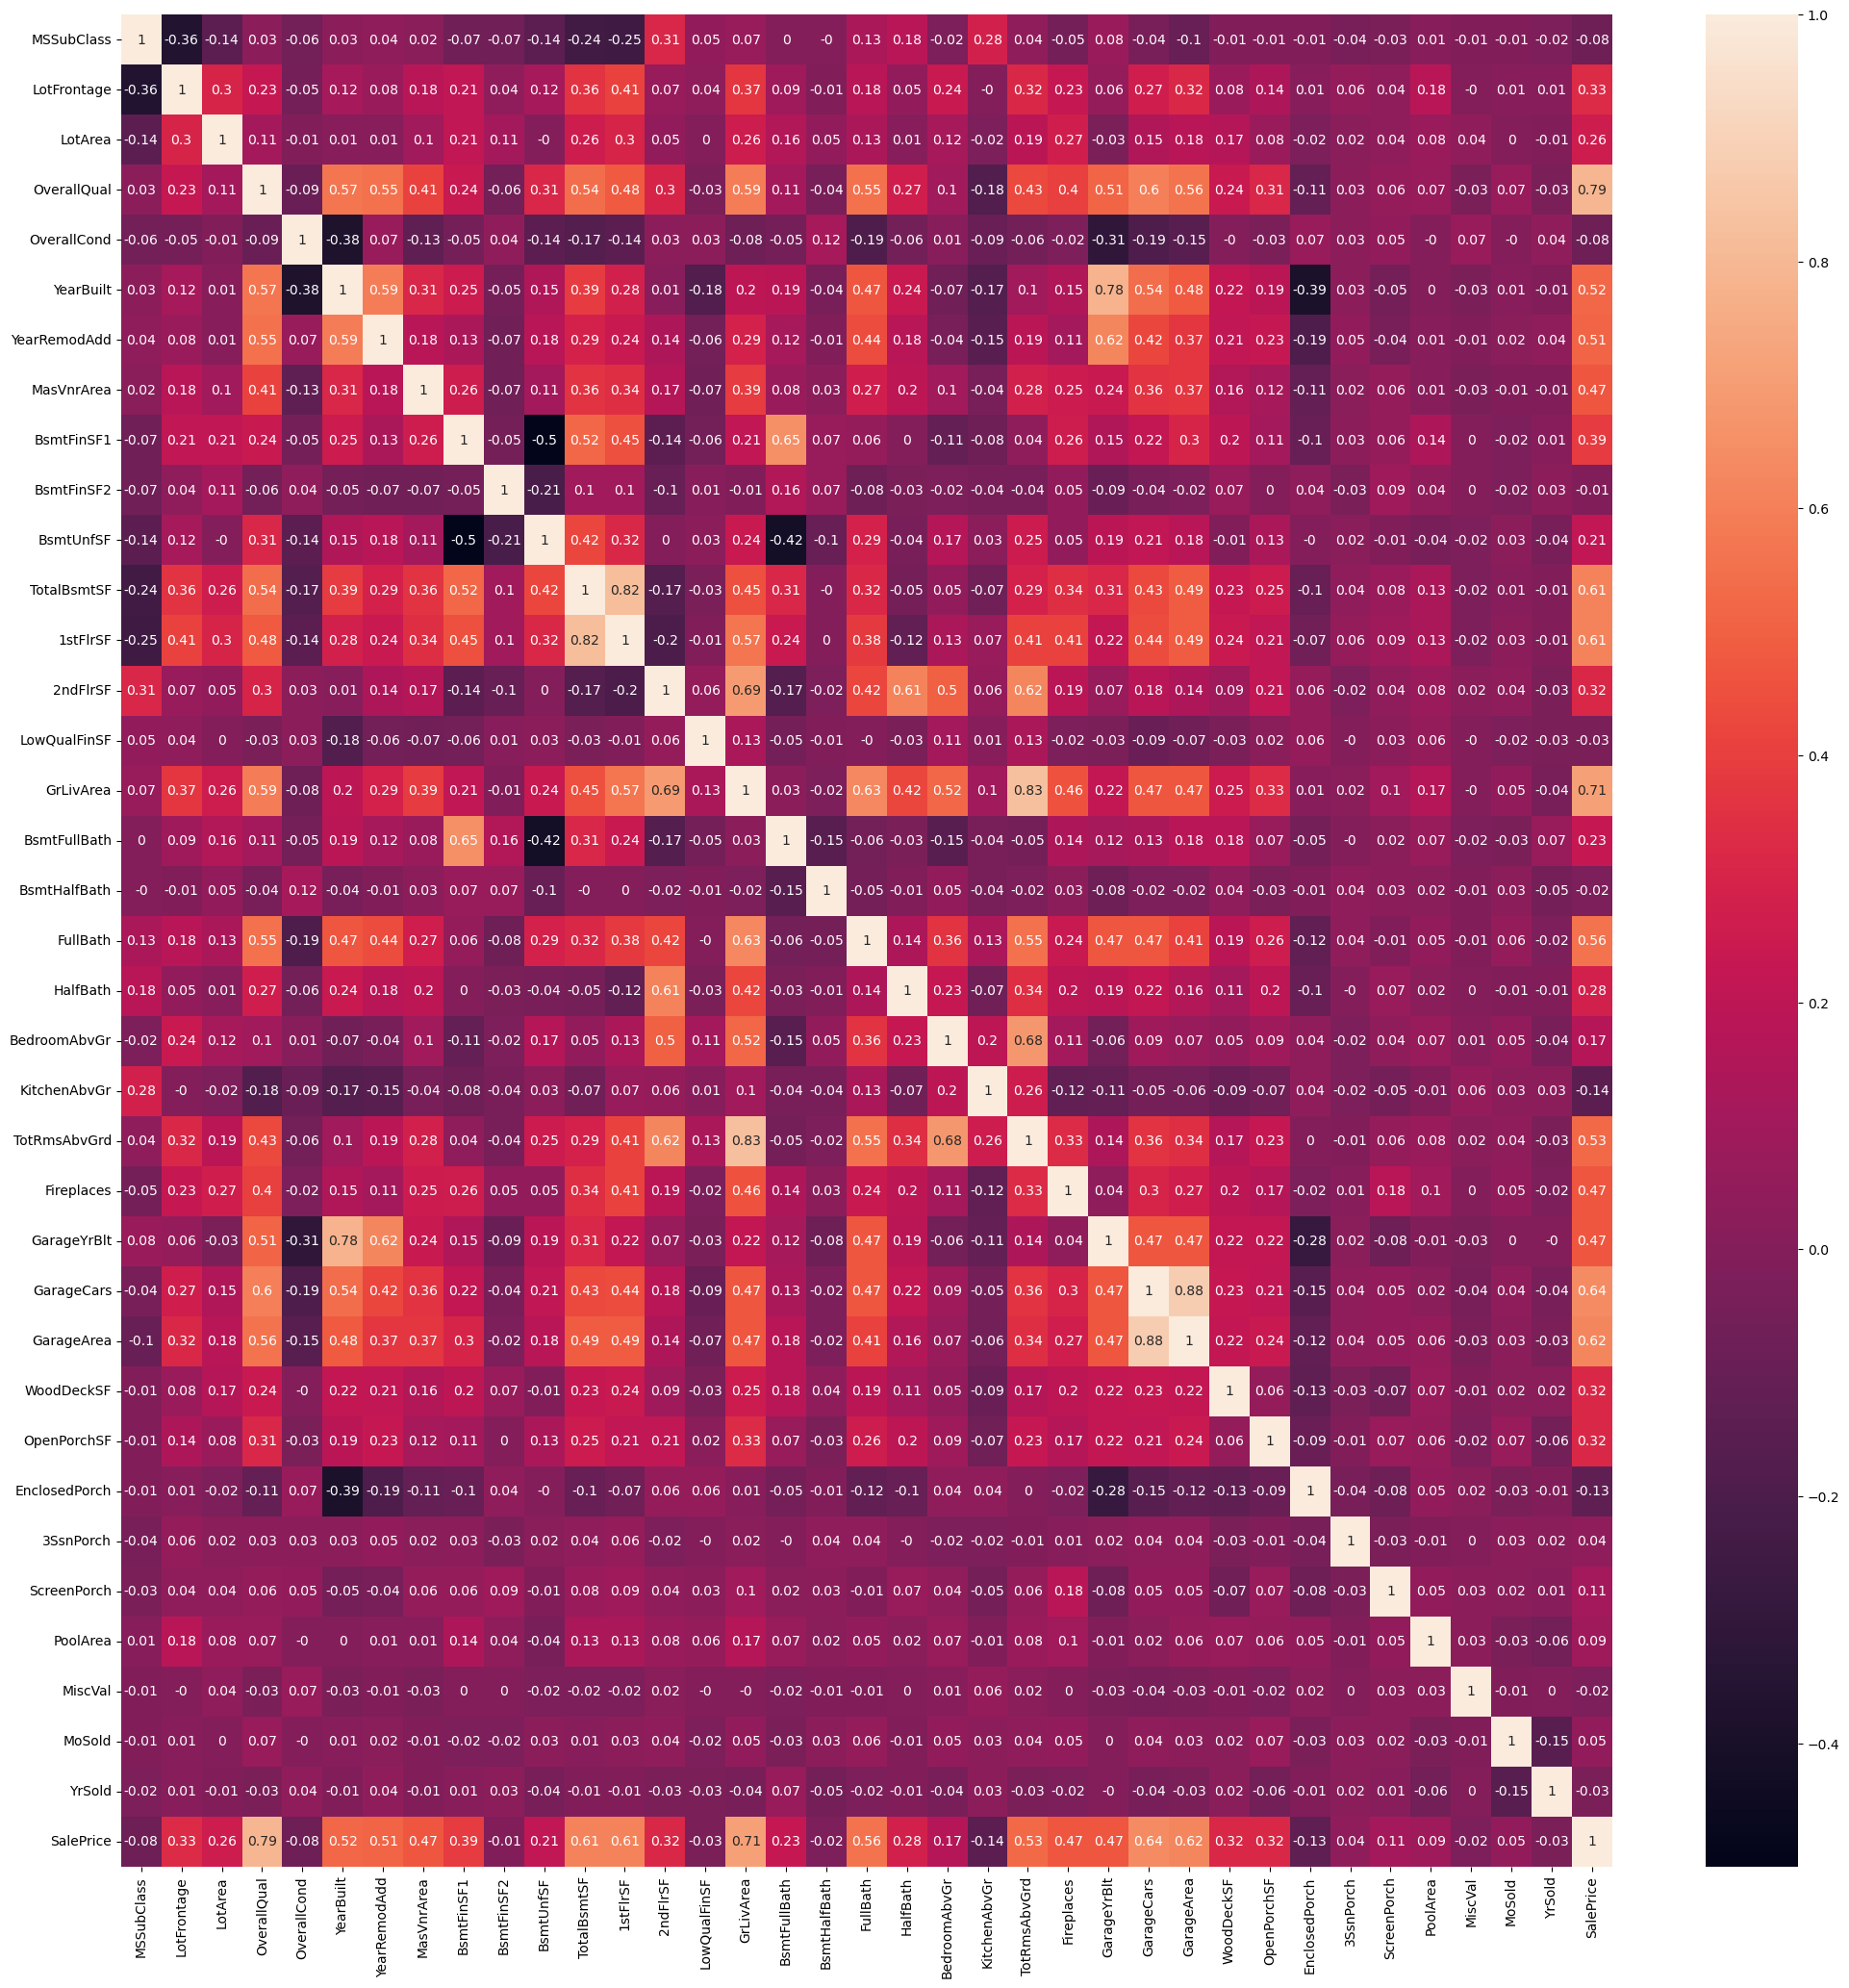

In [1080]:
#Do a heatmap to see how columns are dependent on each other for numeric variables

ax = plt.subplots(figsize=(25,25))

sns.heatmap(housingprices.corr().round(2), annot=True);


In [1081]:
#Dropping the below columns as they are least impacted to the overall sales prices
#PoolArea - mostly the data is 0 except 7 rows
#MiscVal - not effecting SalePrice
#ScreenPorch 
#3SsnPorch - mostly the data is 0
#EnclosedPorch - mostly the data is 0
#KitchenAbvGr  
#BsmtHalfBath

#other variables are categorical variables but represented numerical in the dataset

housingprices.drop(['PoolArea', 'MiscVal', '3SsnPorch', 'ScreenPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath'], axis = 1, inplace = True)


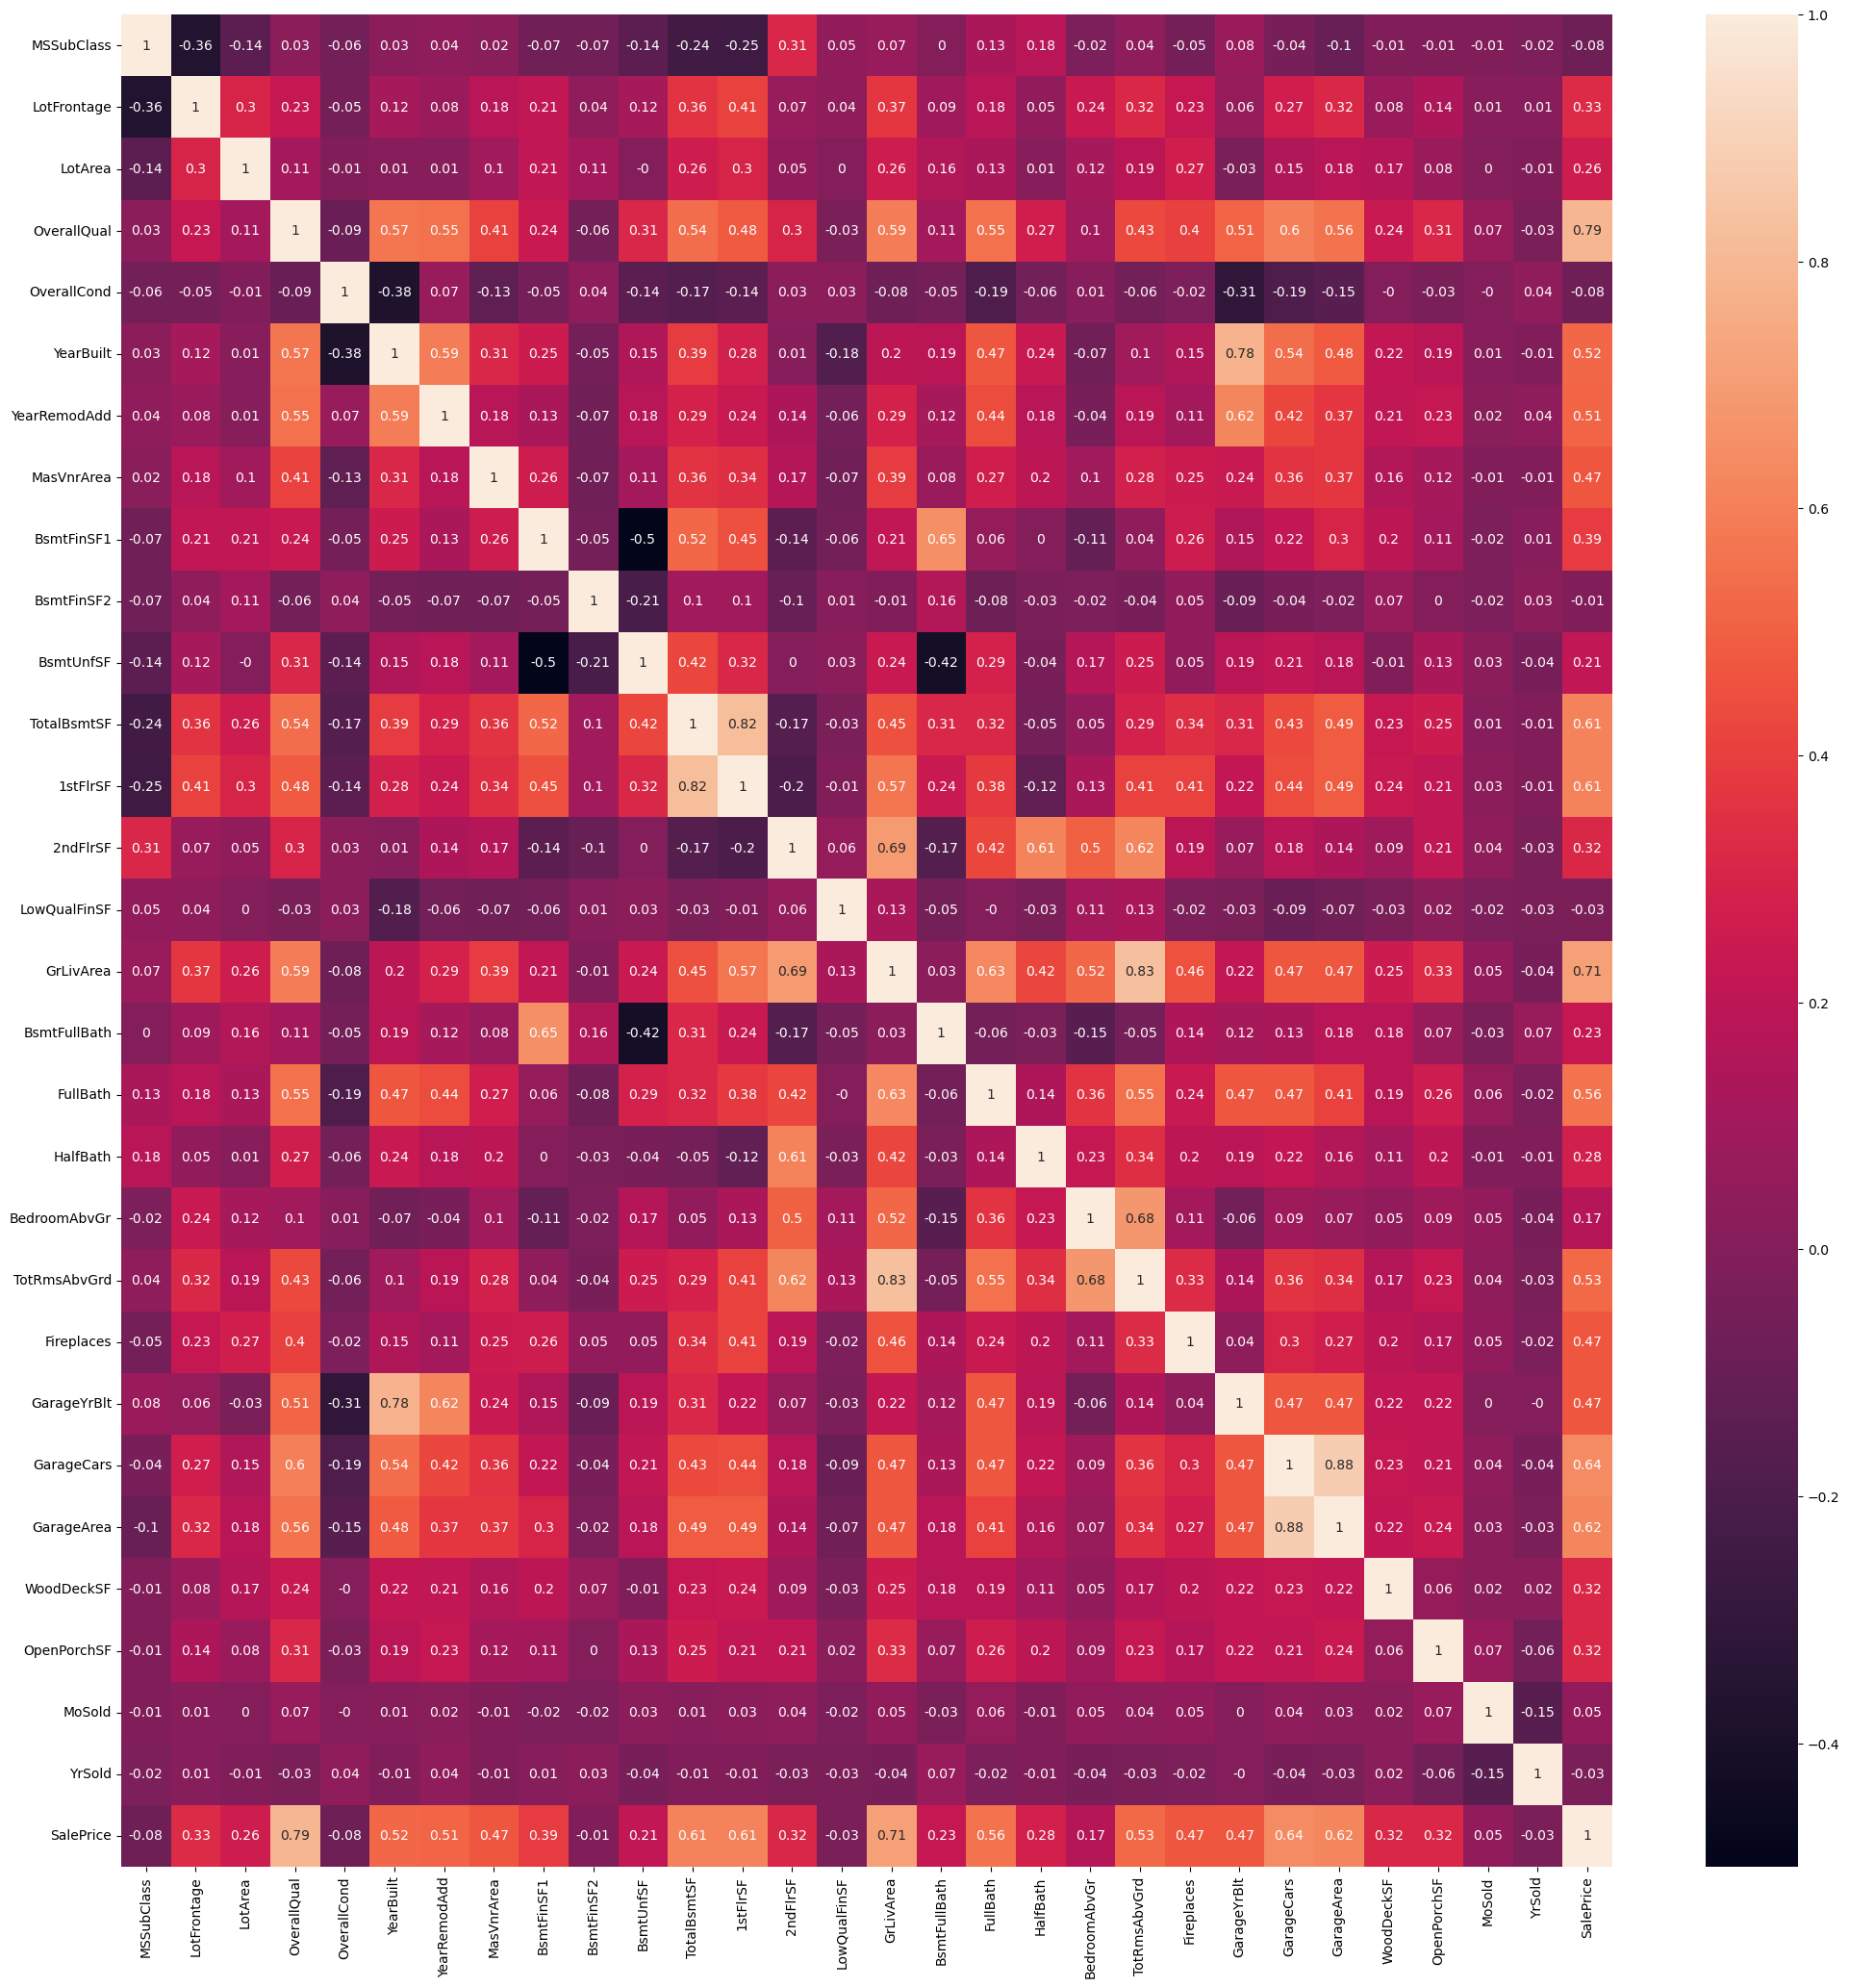

In [1082]:
ax = plt.subplots(figsize=(25,25))

sns.heatmap(housingprices.corr().round(2), annot=True);


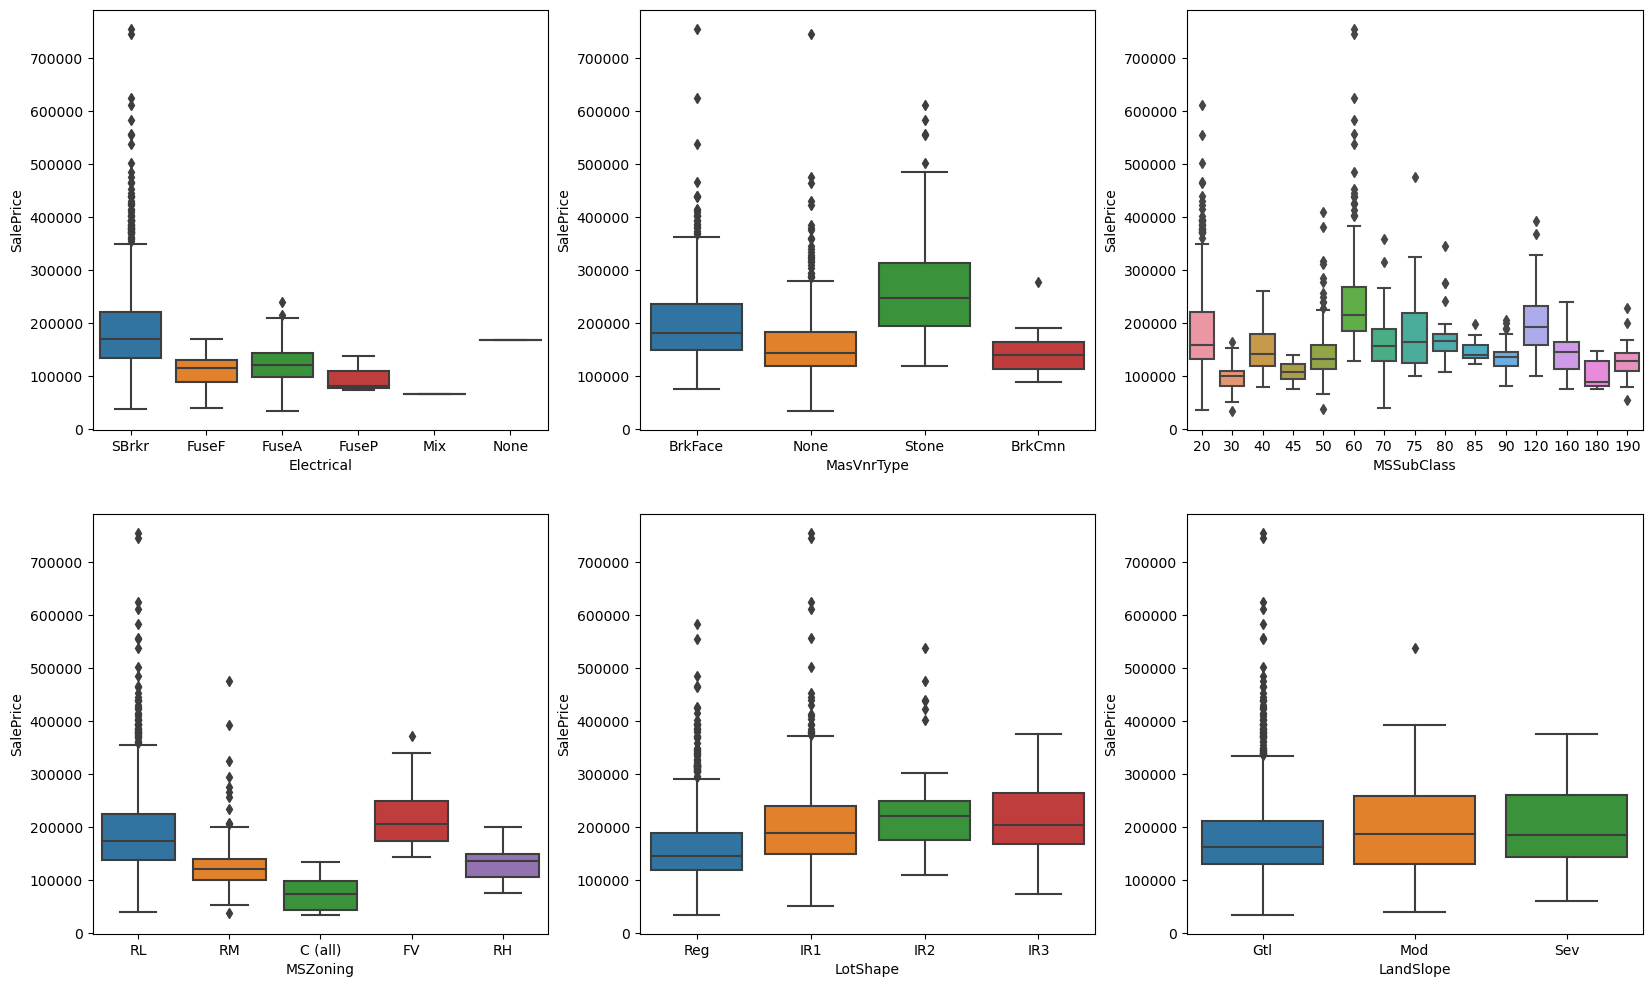

In [1083]:
#visualizing the categorical vairbales
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='Electrical', y='SalePrice', data=housingprices)
plt.subplot(2,3,2)
sns.boxplot(x='MasVnrType', y='SalePrice', data=housingprices)
plt.subplot(2,3,3)
sns.boxplot(x='MSSubClass', y='SalePrice', data=housingprices)
plt.subplot(2,3,4)
sns.boxplot(x='MSZoning', y='SalePrice', data=housingprices)
plt.subplot(2,3,5)
sns.boxplot(x='LotShape', y='SalePrice', data=housingprices)
plt.subplot(2,3,6)
sns.boxplot(x='LandSlope', y='SalePrice', data=housingprices)
plt.show()

In [1084]:
housingprices["TranformedSalePrice"] = np.log(housingprices["SalePrice"])

In [1085]:
#Converting categorical values to numerical values
categoricalvalues = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 
                         'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for i in categoricalvalues:
    feature_set = set(housingprices[i])
    for j in feature_set:
        feature_list = list(feature_set)
        housingprices.loc[housingprices[i] == j, i] = feature_list.index(j)


In [1086]:
housingprices.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TranformedSalePrice
0,60,0,65.0,8450,0,2,1,1,0,0,...,61,3,1,0,2,2008,0,2,208500,12.247694
1,20,0,80.0,9600,0,2,1,1,0,3,...,0,3,1,0,5,2007,0,2,181500,12.109011
2,60,0,68.0,11250,0,2,0,1,0,0,...,42,3,1,0,9,2008,0,2,223500,12.317167
3,70,0,60.0,9550,0,2,0,1,0,2,...,35,3,1,0,2,2006,0,1,140000,11.849398
4,60,0,84.0,14260,0,2,0,1,0,3,...,84,3,1,0,12,2008,0,2,250000,12.429216


In [1087]:
#find how many missing values exist in the data

round(housingprices.isnull().sum()/len(housingprices.index), 2)*100

housingprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   MSZoning             1460 non-null   object 
 2   LotFrontage          1460 non-null   float64
 3   LotArea              1460 non-null   int64  
 4   Street               1460 non-null   object 
 5   Alley                1460 non-null   object 
 6   LotShape             1460 non-null   object 
 7   LandContour          1460 non-null   object 
 8   Utilities            1460 non-null   object 
 9   LotConfig            1460 non-null   object 
 10  LandSlope            1460 non-null   object 
 11  Neighborhood         1460 non-null   object 
 12  Condition1           1460 non-null   object 
 13  Condition2           1460 non-null   object 
 14  BldgType             1460 non-null   object 
 15  HouseStyle           1460 non-null   o

# Data Modelling

In [1088]:
#Dropping SalePrice and TransformedSalePrice from the independent variabbles
x = housingprices.drop(["SalePrice", "TranformedSalePrice"], axis = 1).values
y = housingprices["TranformedSalePrice"].values

#splitting into train and test variables
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 73)
(439, 74)


In [1089]:

#Building the model with the linear regression

lm = LinearRegression()

lm.fit(x_train,y_train)

#evaluating the model
#calculate the r2 value, residual sum of squre (RSS) and mean squared error for the linear regression
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

r2_train_lr = r2_score(y_train, y_pred_train)

print(r2_train_lr)
#creating a metric list
metric = []
metric.append(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lr)
metric.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lr)
metric.append(rss_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr)

0.8969538004040193
0.7890729300866753
16.538115633589843
15.201212522153176
0.016197958504985156
0.03470596466245017


#### The r2 square value of training (0.8969538004040193) and test data (0.7890729300866753) differs a lot which is a sign of data overfitting

### Below we will use regularization techniques

### Finding the optimal alpha value to tune the model

In [1090]:
params = {'alpha' : np.linspace(0.1, 1, num = 100)}

lrls = Lasso()
#Grid Search cross validation
folds = 5
model_cv = GridSearchCV(estimator = lrls,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(x_train, y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'alpha': 0.3}


In [1091]:
#Fitting Lasso model for alpha - 0.30

lrls = Lasso(alpha=0.3)
lrls.fit(x_train,y_train)

#Evaluate the model using the above alpha for Lasso Regression
#calculate the r2 value, residual sum of squre (RSS) and mean squared error for the linear regression
y_pred_train = lrls.predict(x_train)
y_pred_test = lrls.predict(x_test)

r2_train_lrls = r2_score(y_train, y_pred_train)

metric2 = []
print(r2_train_lrls)
metric2.append(r2_train_lrls)


r2_test_lrls = r2_score(y_test, y_pred_test)
print(r2_test_lrls)
metric2.append(r2_test_lrls)

rss_train_lrls = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lrls)
metric2.append(rss_train_lrls)

rss_test_lrls = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lrls)
metric2.append(rss_test_lrls)

mse_train_lrls = mean_squared_error(y_train, y_pred_train)
print(mse_train_lrls)
metric2.append(mse_train_lrls)

mse_test_lrls = mean_squared_error(y_test, y_pred_test)
print(mse_test_lrls)
metric2.append(mse_test_lrls)


0.78039306138006
0.7923115889828343
35.24521000361954
14.967807003423387
0.034520284038804645
0.034173075350281704


## Trying Ridge regression technique now

In [1092]:
params = {'alpha' : np.linspace(0.1, 1, num = 100)}

lrReg = Ridge()
#Grid Search cross validation
folds = 5
model_cv = GridSearchCV(estimator = lrReg,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(x_train, y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'alpha': 0.1181818181818182}


In [1093]:
#Fitting Ridge model for alpha - 0.11

lrReg = Ridge(alpha=0.11)
lrReg.fit(x_train,y_train)

#Evaluate the model using the above alpha for Lasso Regression
#calculate the r2 value, residual sum of squre (RSS) and mean squared error for the linear regression
y_pred_train = lrReg.predict(x_train)
y_pred_test = lrReg.predict(x_test)

r2_train_lrReg = r2_score(y_train, y_pred_train)

metric3 = []
print(r2_train_lrReg)
metric3.append(r2_train_lrReg)


r2_test_lrReg = r2_score(y_test, y_pred_test)
print(r2_test_lrReg)
metric3.append(r2_test_lrReg)

rss_train_lrReg = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lrReg)
metric3.append(rss_train_lrReg)

rss_test_lrReg = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lrReg)
metric3.append(rss_test_lrReg)

mse_train_lrReg = mean_squared_error(y_train, y_pred_train)
print(mse_train_lrReg)
metric3.append(mse_train_lrReg)

mse_test_lrReg = mean_squared_error(y_test, y_pred_test)
print(mse_test_lrReg)
metric3.append(mse_test_lrReg)

0.8969509259505234
0.7907878498898716
16.53857696107678
15.07762070248988
0.01619841034385581
0.03442379155819607


In [1094]:
#Creating table with all the metrics

lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)' ], 
                 'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])

ls_metric = pd.Series(metric2, name = 'Lasso Regression')
rg_metric = pd.Series(metric3, name = 'Ridge Regression')

ls_metric

final_metric = pd.concat([lr_metric, ls_metric, rg_metric], axis = 1)

final_metric

,Metric,Linear Regression,Lasso Regression,Ridge Regression
0,R2 Score (Train),0.896954,0.780393,0.896951
1,R2 Score (Test),0.789073,0.792312,0.790788
2,RSS (Train),16.538116,35.245210,16.538577
3,RSS (Test),15.201213,14.967807,15.077621
4,MSE (Train),0.016198,0.034520,0.016198
5,MSE (Test),0.034706,0.034173,0.034424


In [1095]:
lrls.coef_

array([-4.46282365e-04, -0.00000000e+00, -0.00000000e+00,  1.57551445e-06,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.07691937e-03,  2.92578836e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  6.17757328e-05, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.96546874e-05, -0.00000000e+00,  2.95294606e-05,
       -4.54217580e-08,  1.11107563e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.17391606e-04,  1.34134642e-04,
       -0.00000000e+00,  1.76514123e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [1096]:
lrReg.coef_

array([-4.56697117e-04, -1.52623045e-02,  1.24328943e-04,  1.91804591e-06,
       -2.06449309e-01, -1.15226716e-02, -6.30392284e-04, -1.98520525e-02,
       -2.65393866e-02, -1.64987011e-03, -2.95342906e-02, -2.30477598e-03,
        1.35909839e-02,  5.66706526e-02,  1.56350017e-02, -5.18022178e-03,
        7.71769236e-02,  3.92670384e-02,  1.81329244e-03,  1.42634964e-03,
       -1.82304420e-03,  1.98375350e-02,  1.88126256e-04,  2.65965746e-03,
        8.51898115e-04,  1.10304150e-06, -1.27049222e-02,  1.55234073e-04,
        1.13358809e-02, -1.66904637e-02,  1.56869730e-02, -1.65407782e-03,
        9.16813599e-03,  2.13492749e-05, -7.85558351e-03,  7.60457542e-05,
       -2.27421445e-06,  9.51208006e-05, -9.59992720e-03, -7.96476606e-03,
       -4.59770997e-02,  4.97046910e-03,  3.75066199e-05,  5.06256738e-05,
        8.45759596e-05,  1.72708930e-04,  5.37497241e-02,  2.30927731e-02,
        2.66575589e-02,  7.22638719e-03,  7.29396151e-04, -3.13367818e-03,
        3.31800083e-03,  